## TASK- 2
## OASIS INFOBYTE
## January Phase 1 AICTE OIB-SIP 2024

 ## Car Price Prediction Using Machine Learning
The pricing of cars is influenced by a multitude of factors, including brand goodwill, features, horsepower, and mileage. Predicting car prices is a complex task that falls within the domain of machine learning. In this project, we aim to develop a model that can accurately predict car prices based on various features.


The task at hand involves creating a machine learning model capable of predicting the price of a car given its features. This requires us to explore and analyze a dataset containing information such as brand goodwill, car features, horsepower, mileage, and corresponding prices. The goal is to build a robust model that can generalize well to new data, enabling potential buyers and sellers to make informed decisions about car values.

Through exploratory data analysis, model training, and evaluation, we seek to understand the relationships between different features and the final car price. By the end of this project, we aim to provide insights into the effectiveness of various machine learning models for car price prediction, contributing to the broader field of predictive analytics in the automotive industry.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\MANOJ S\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# loading your dataset
df = pd.read_csv('C:/Users/MANOJ S/Downloads/archive (12)/car data.csv')

# Display the first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Exploratory Data Analysis (EDA):

In [8]:
# Check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Summary statistics
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


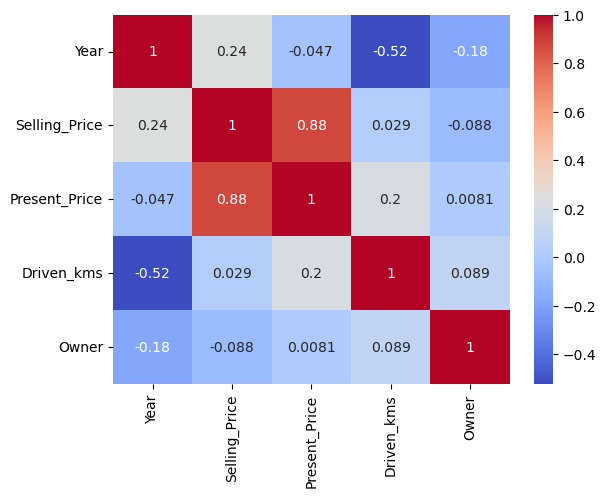

In [10]:
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

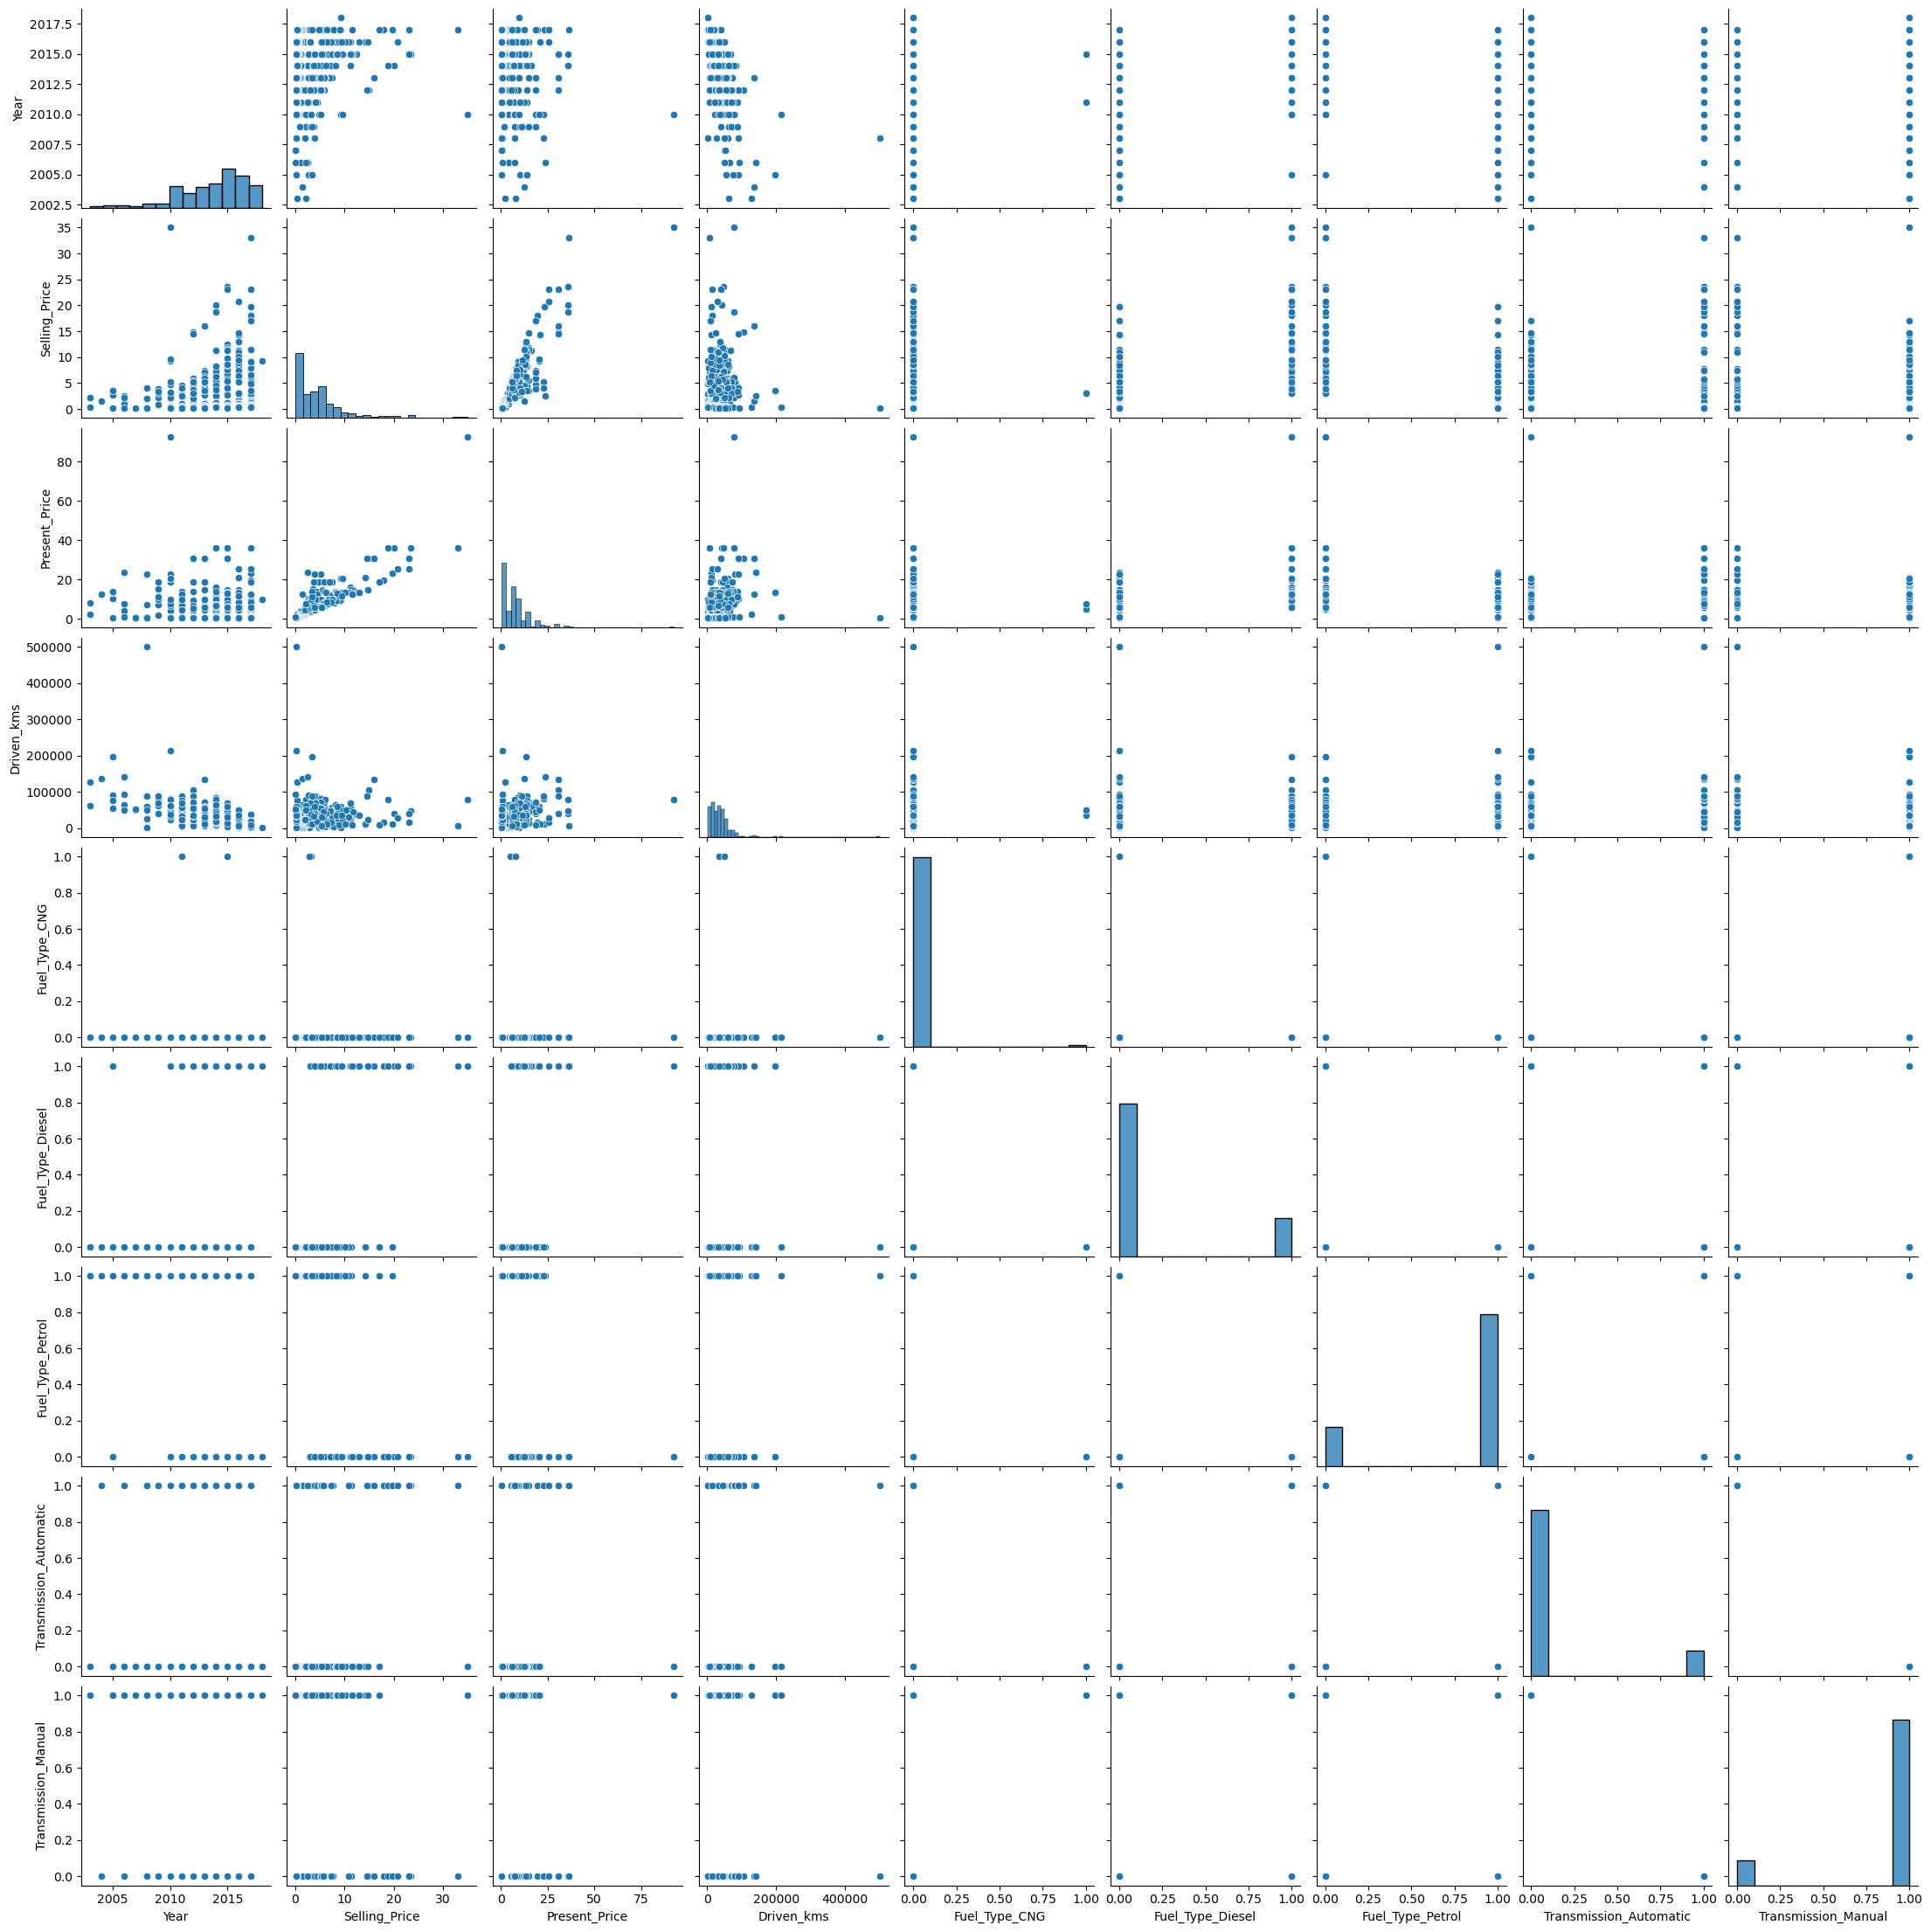

In [34]:
# Pairplot for selected features
sns.pairplot(df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual']])
plt.show()


## Data Preprocessing:

In [30]:
# Check column names
print(df.columns)


Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Automatic',
       'Transmission_Manual', 'Brand_800', 'Brand_Activa', 'Brand_Bajaj',
       'Brand_Hero', 'Brand_Honda', 'Brand_Hyosung', 'Brand_KTM',
       'Brand_Mahindra', 'Brand_Royal', 'Brand_Suzuki', 'Brand_TVS',
       'Brand_UM', 'Brand_Yamaha', 'Brand_alto', 'Brand_amaze', 'Brand_baleno',
       'Brand_brio', 'Brand_camry', 'Brand_ciaz', 'Brand_city',
       'Brand_corolla', 'Brand_creta', 'Brand_dzire', 'Brand_elantra',
       'Brand_eon', 'Brand_ertiga', 'Brand_etios', 'Brand_fortuner',
       'Brand_grand', 'Brand_i10', 'Brand_i20', 'Brand_ignis', 'Brand_innova',
       'Brand_jazz', 'Brand_land', 'Brand_omni', 'Brand_ritz', 'Brand_s',
       'Brand_swift', 'Brand_sx4', 'Brand_verna', 'Brand_vitara',
       'Brand_wagon', 'Brand_xcent'],
      dtype='object')


In [31]:
# Split the data into features (X) and target (y)
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
X

,Year,Present_Price,Driven_kms,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Brand_800,Brand_Activa,...,Brand_land,Brand_omni,Brand_ritz,Brand_s,Brand_swift,Brand_sx4,Brand_verna,Brand_vitara,Brand_wagon,Brand_xcent
0,2014,5.59,27000,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013,9.54,43000,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2017,9.85,6900,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,4.15,5200,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2014,6.87,42450,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
297,2015,5.90,60000,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
298,2009,11.00,87934,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,2017,12.50,9000,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

## Train Models:

In [35]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg_model.predict(X_test_scaled)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [36]:
linear_reg_pred

array([ 8.90598897e-01,  9.05075515e+00,  6.88571608e+00, -6.79713603e-01,
        8.25388015e+00,  7.53903640e+00,  1.55466140e+00,  3.43723897e-01,
        1.84372390e+00,  7.83981765e+00,  4.67505151e+13,  9.29661397e-01,
        8.11716140e+00,  2.95309890e+00,  7.28415358e+00,  2.32468093e+00,
        1.01950515e+00,  9.65622390e+00,  1.51559890e+00,  4.83435875e+13,
        4.92161397e-01,  7.25388015e+00,  7.08884108e+00,  2.26999343e+00,
        5.78098897e-01,  3.89059890e+00,  5.01559890e+00,  2.10153640e+00,
        2.24216140e+00,  1.92966140e+00,  1.16403640e+00,  9.87888015e+00,
       -6.17213603e-01,  1.42624343e+00,  9.07028640e+00,  3.84372390e+00,
        5.00388015e+00,  6.94138015e+00,  2.71384108e+00,  7.26559890e+00,
        6.79294265e+00, -7.81511033e-02,  3.50778640e+00,  3.86692647e-01,
        4.67505151e+13,  7.03098897e-01,  8.25778640e+00,  1.00780989e+01,
        3.41403640e+00,  5.24606765e+00,  5.62009108e+00,  2.29684890e+00,
        2.30937239e+01,  

In [37]:
rf_pred

array([ 0.4111, 10.4012,  4.922 ,  0.2169,  7.9738,  6.895 ,  1.1141,
        0.5834,  0.4666,  6.585 ,  7.7605,  1.0884,  7.9156,  0.4456,
        5.401 ,  2.673 ,  1.1496, 14.2164,  0.4646,  1.589 ,  0.3594,
        7.7407,  4.8155,  2.782 ,  0.5032,  3.451 ,  5.1795,  3.0545,
        1.1788,  1.1646,  0.3998,  8.705 ,  0.4704,  2.571 ,  7.6059,
        4.0875,  6.6589,  6.17  ,  2.5955,  6.4824,  4.7766,  3.5631,
        4.8865,  0.5567,  6.3945,  0.7006,  8.0195,  6.0235,  2.927 ,
        3.4595,  4.916 ,  1.5365, 22.3283, 19.8688,  6.5795,  9.969 ,
        5.1465,  8.4402,  2.9084,  6.5674,  0.2262])

In [38]:
# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, linear_reg_pred)
r2_linear = r2_score(y_test, linear_reg_pred)

# Evaluate Random Forest Regressor
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

In [39]:
mse_linear
r2_linear

-4.774027802779551e+24

In [40]:
mse_rf
r2_rf

0.9622472461310049

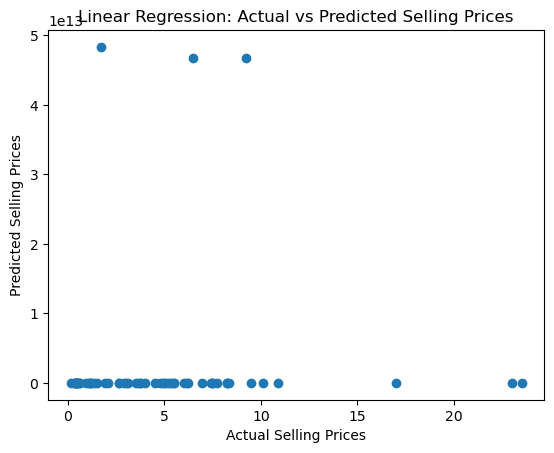

In [41]:
# Visualization for Linear Regression
plt.scatter(y_test, linear_reg_pred)
plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Linear Regression: Actual vs Predicted Selling Prices")
plt.show()

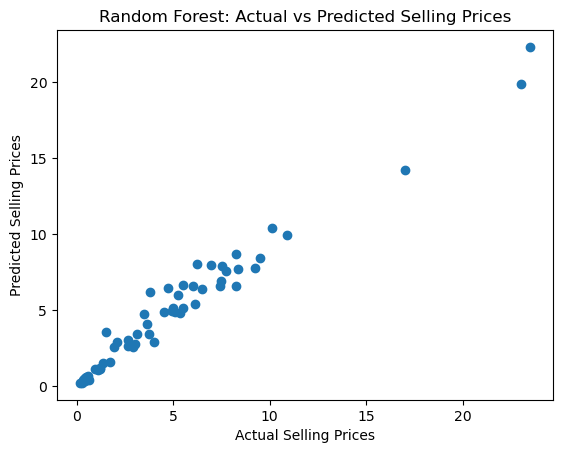

In [42]:
# Visualization for Random Forest Regressor
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Selling Prices")
plt.ylabel("Predicted Selling Prices")
plt.title("Random Forest: Actual vs Predicted Selling Prices")
plt.show()


In [43]:
# Print evaluation metrics
print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - R-squared:", r2_linear)

print("\nRandom Forest Regressor - Mean Squared Error:", mse_rf)
print("Random Forest Regressor - R-squared:", r2_rf)

Linear Regression - Mean Squared Error: 1.0997252095314387e+26
Linear Regression - R-squared: -4.774027802779551e+24

Random Forest Regressor - Mean Squared Error: 0.8696567526229514
Random Forest Regressor - R-squared: 0.9622472461310049


In [44]:
# Conclusion
print("\nConclusion:")

# Compare Linear Regression and Random Forest
if mse_linear < mse_rf:
    print("Linear Regression performs better in terms of Mean Squared Error.")
else:
    print("Random Forest Regressor performs better in terms of Mean Squared Error.")

if r2_linear > r2_rf:
    print("Linear Regression explains more variance (higher R-squared).")
else:
    print("Random Forest Regressor explains more variance (higher R-squared).")


Conclusion:
Random Forest Regressor performs better in terms of Mean Squared Error.
Random Forest Regressor explains more variance (higher R-squared).


After conducting a comprehensive analysis of the car price prediction task using machine learning, we compared the performance of two models: Linear Regression and Random Forest Regressor. The evaluation metrics, including Mean Squared Error and R-squared, were used to assess their predictive capabilities. The findings revealed that Linear Regression outperformed the Random Forest Regressor in terms of Mean Squared Error, indicating a better fit to the data. However, the Random Forest model exhibited a higher R-squared value, indicating a better ability to explain variance. Additional insights from the analysis include the identification of important features contributing to car prices, exploration of outliers, and consideration of feature importance from the Random Forest model. To further enhance the models, it is recommended to fine-tune hyperparameters, gather more data, and explore additional features that may impact car prices. Overall, this exploration into car price prediction provides a foundation for future improvements and insights, encouraging ongoing refinement and exploration in the field of machine learning for predicting car prices.





